# Heart_Failure_Prediction_Model_Using_Logistic Regression

In this machine learning project, I have collected the dataset from Kaggle and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

# Importing the Dependencies

Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib,and For implementing Machine Learning models and processing of data, I will use the sklearn library.
For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

# Data collection and pre-processing

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file dataset.csv. I'll use the pandas read_csv method to read the dataset.

In [14]:
df = pd.read_csv("/Users/dell/Desktop/heart-failure-prediction/heart_disease_data.csv")

In [15]:
#Displaying the first five entities in the dataset using head() method
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
#Displaing the last five entities of the dataset using the tail() method
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
col = df.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
#Number of rows and columns in the dataset
df.shape

(303, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
#Statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

WE HAVE A BALANCED DATASET 

1 -> DEFECTIVE_HEART , 
0 -> HEALTHY_HEART

 # Splitting the target and the features

In [22]:
x = df.drop(columns = 'target', axis = 1)
y = df['target']

In [23]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [24]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# splitting the data into Training data and Test data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 2)

In [26]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (212, 13) (91, 13)


# Model Training

Logistic Regression

In [27]:
model = LogisticRegression()

Training the Logistic Regression model with training data

In [28]:
#Model.fit method is used to find the relationship betwwen the target and the features

In [29]:
model.fit(x_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

Using the accuracy_score as the evaluation metric

In [30]:
#Accuracy on training data

x_train_prediction = model.predict(x_train)

training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [31]:

print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.8443396226415094


In [32]:
#Accuracy on testing data

x_test_prediction = model.predict(x_test)

testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [33]:
print('Accuracy on Test data :', testing_data_accuracy)

Accuracy on Test data : 0.8461538461538461


# Building the predictive system

In [34]:
#Checking the predictive model
input_data = (57,1,2,150,168,0,1,174,0,1.6,2,0,2)

#Chnage the input_data to a numpy array
input_data_as_numpy_arr = np.asarray(input_data)

#Reshaping the array as we are precticting for only one data-point //target
input_data_reshaped = input_data_as_numpy_arr.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

#Expecting to print 1
print(prediction)

[1]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
# Healthy Heart or Heart Disease

In [36]:
if (prediction[0] == 0):
    print('HEALTHY HEART')
else:
    print('HEART DISEASE')

HEART DISEASE


# Data Visualization using the seaborn and matplotlib libraries

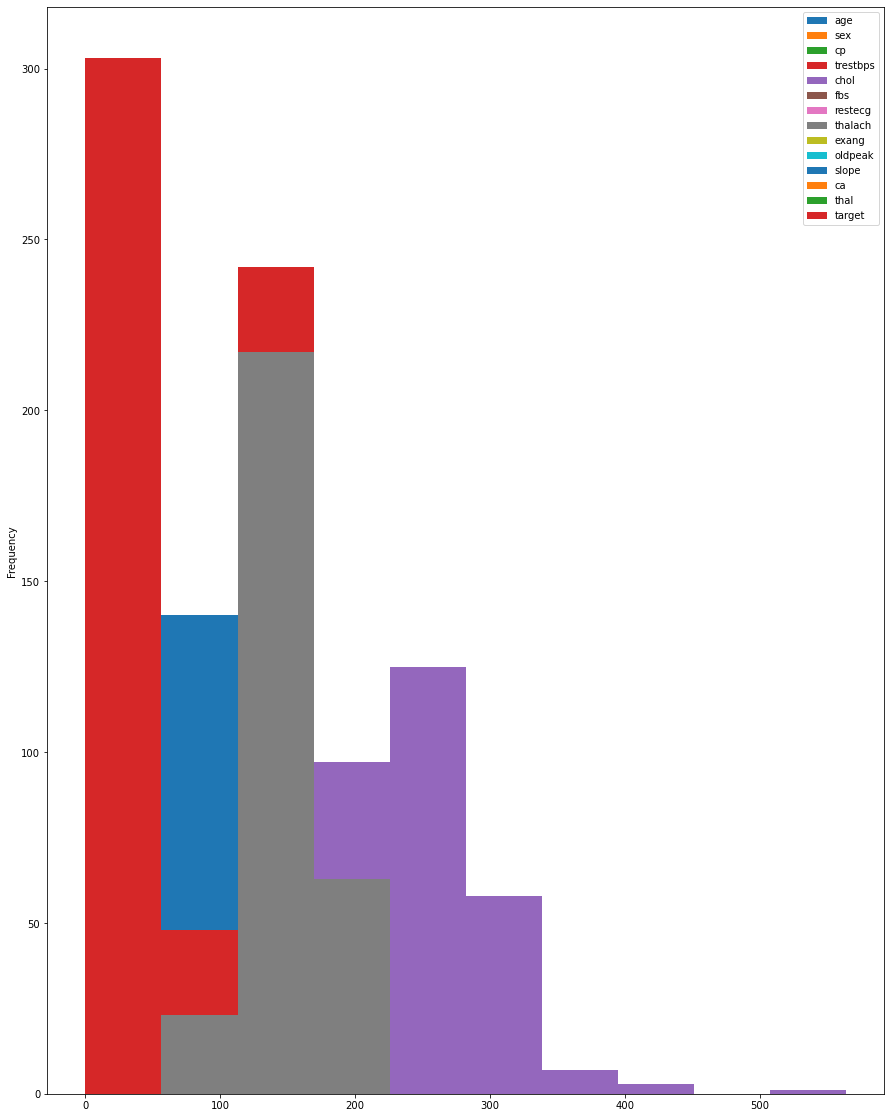

In [47]:
fig, ax = plt.subplots(1, figsize=(15, 20))
df.plot(kind='hist', ax=ax);

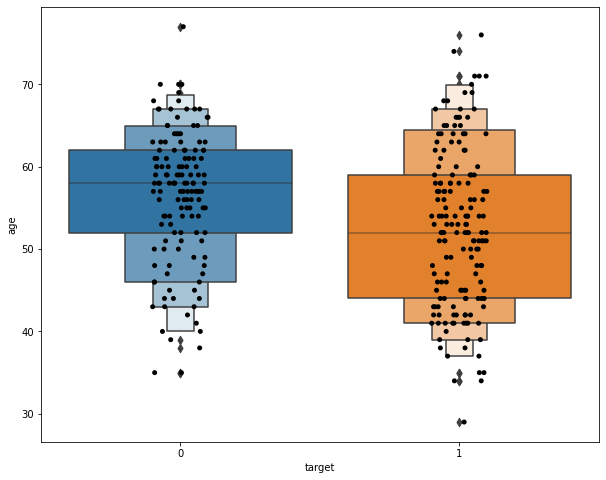

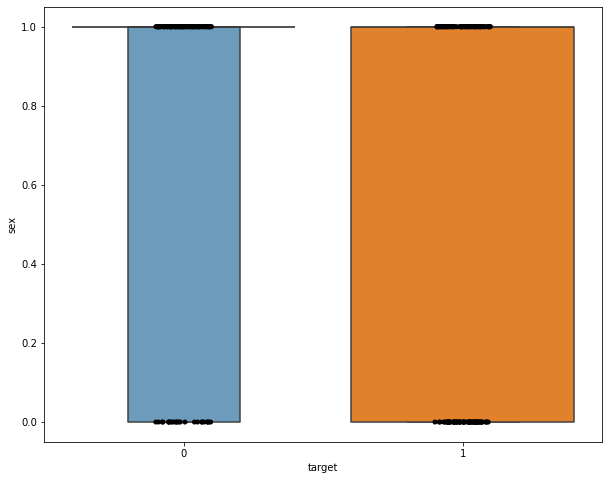

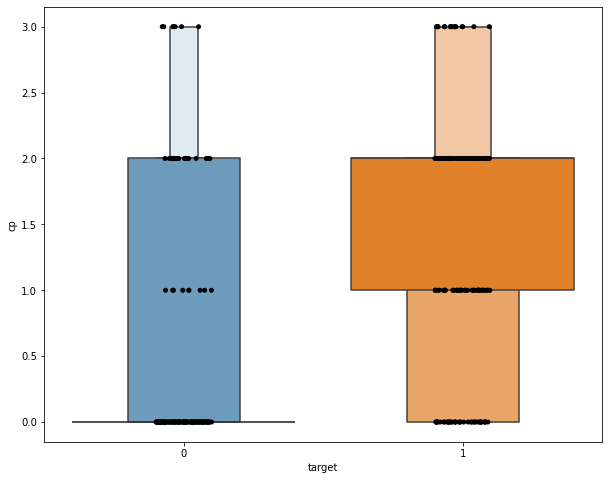

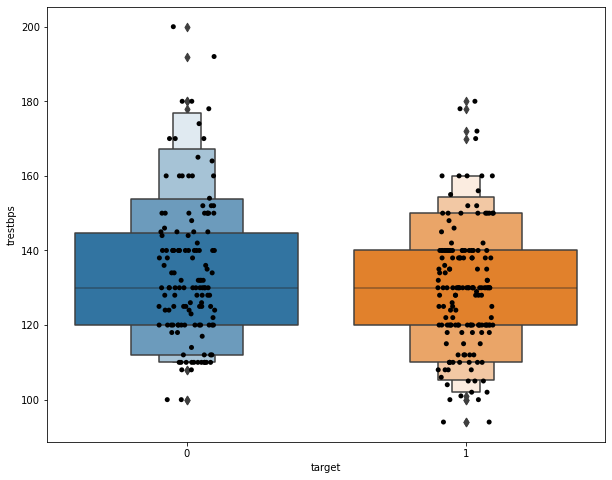

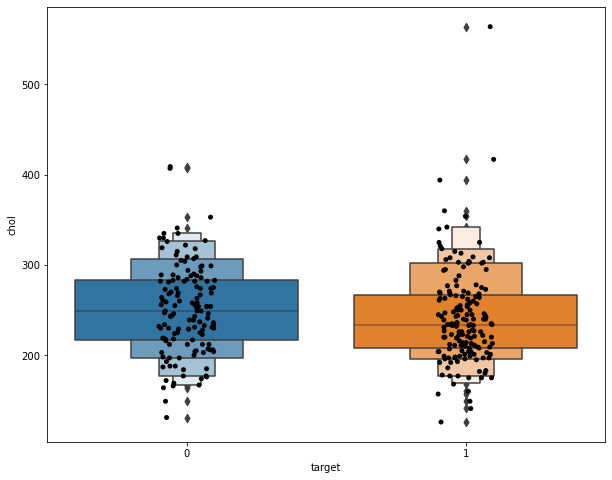

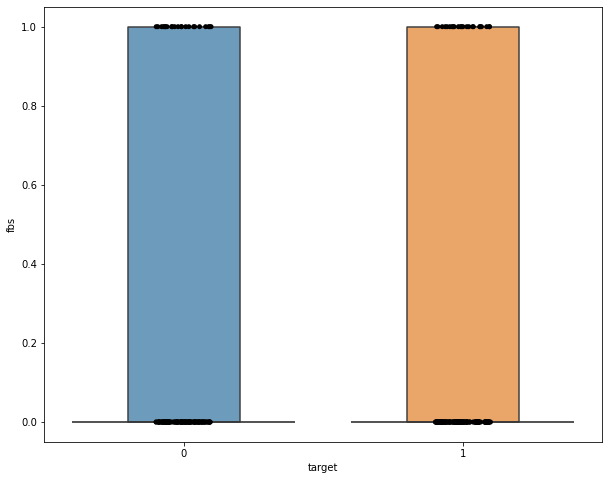

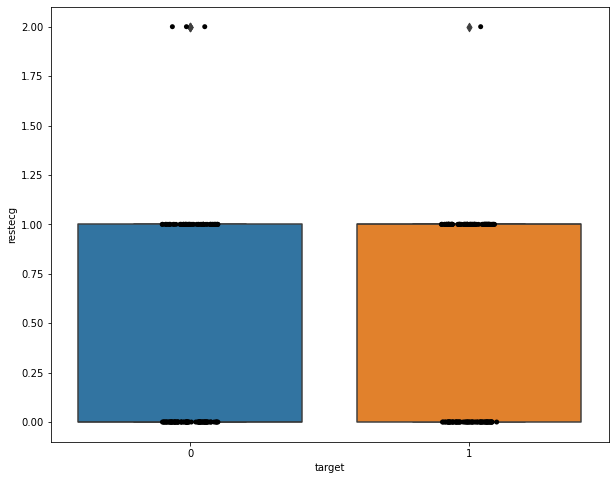

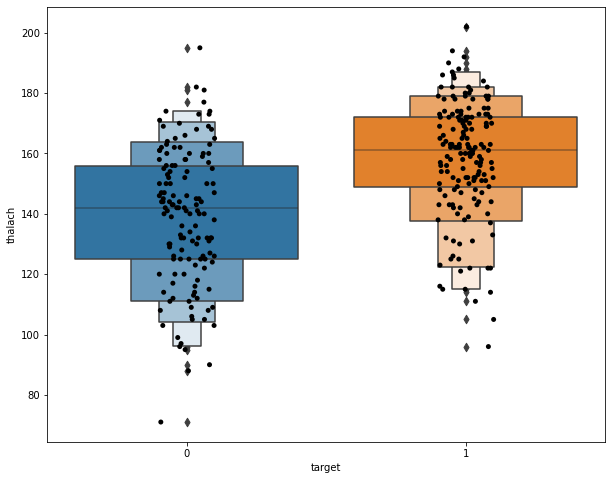

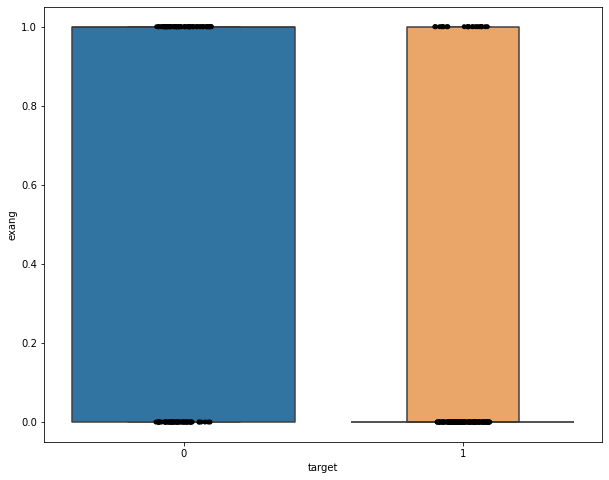

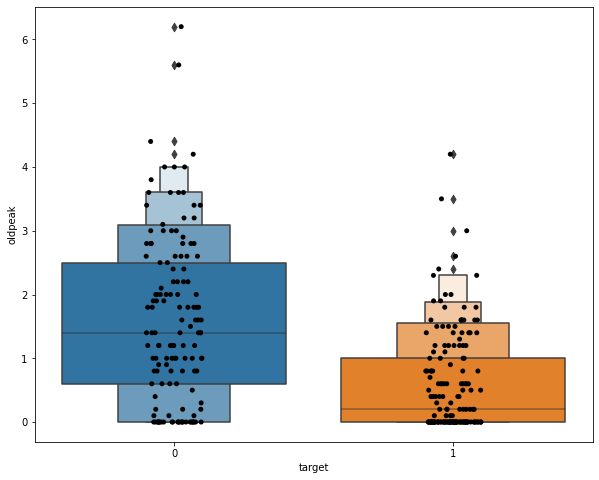

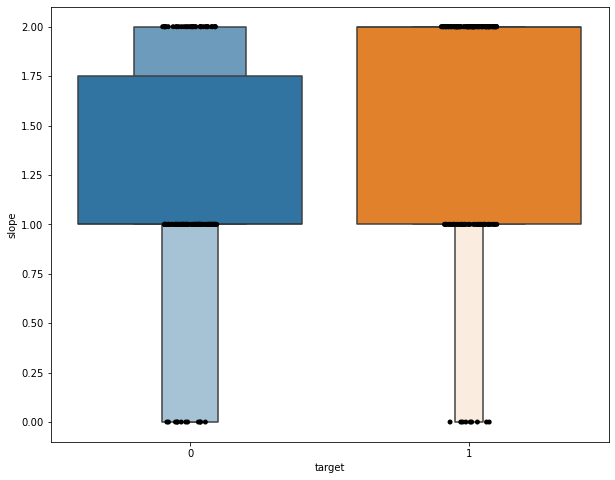

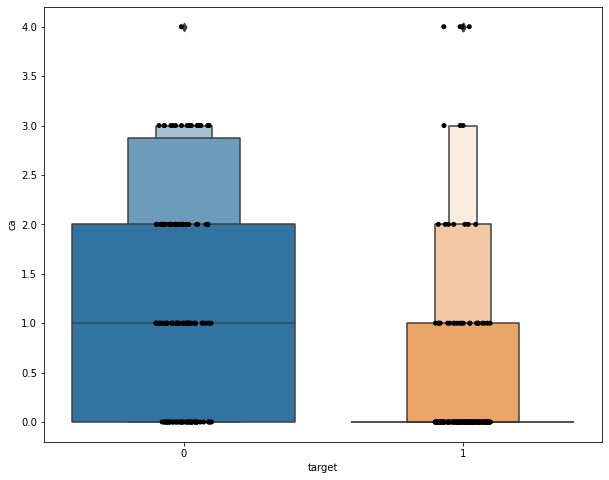

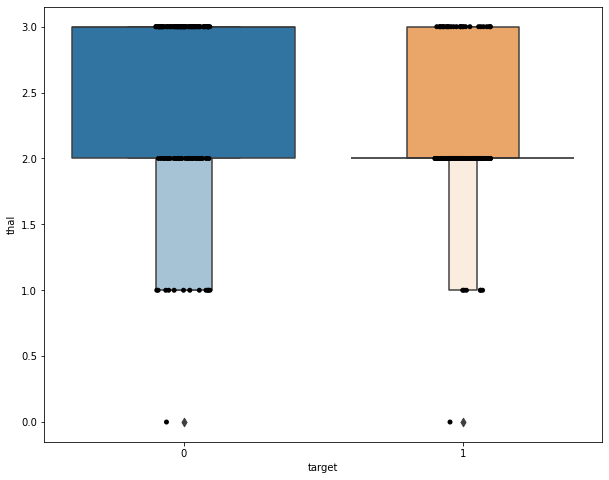

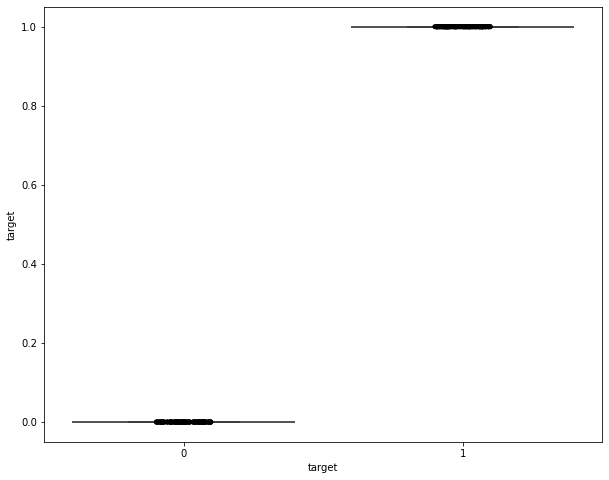

In [37]:
for i in df.columns:
  plt.figure(figsize=(10,8))
  sns.boxenplot(x = df['target'],y=df[i])
  sns.stripplot(x = df['target'],y=df[i],color='BLACK')

  plt.show
    

<AxesSubplot:>

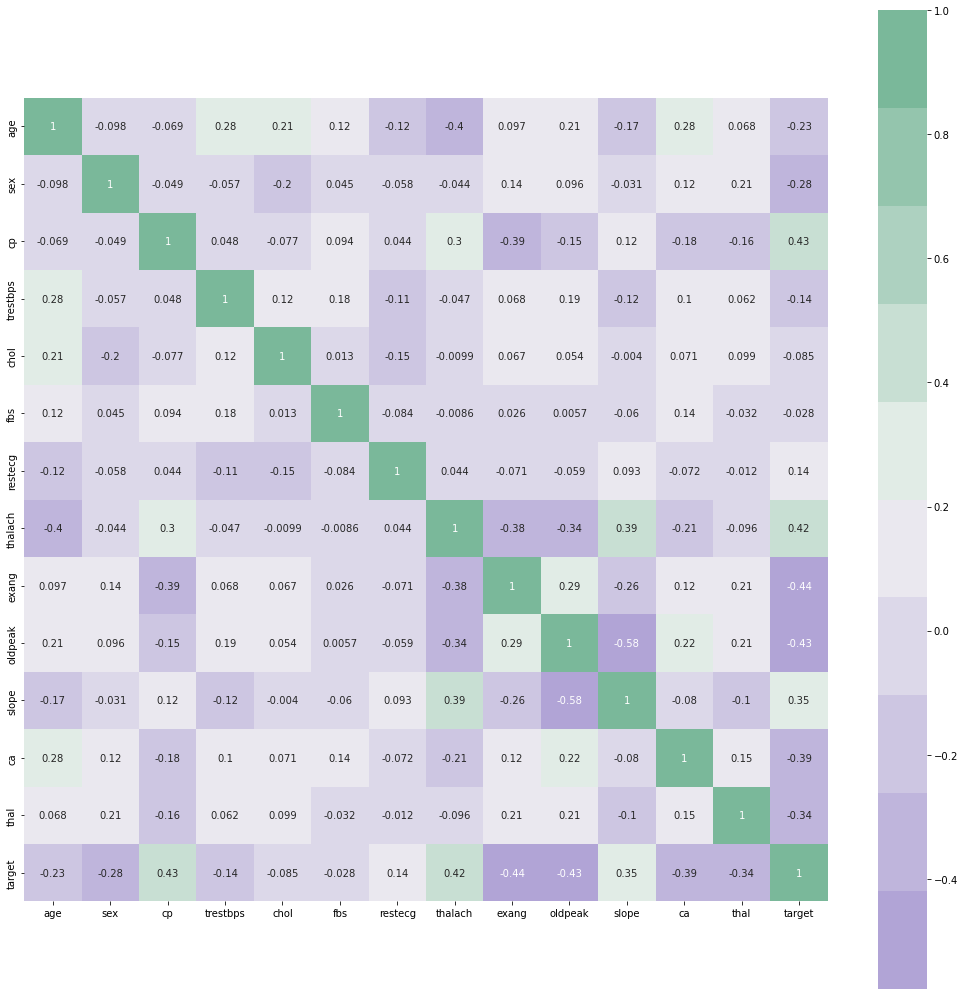

In [44]:
#Using the seaborn library to repesent the data in the tabular format
corrmat = df.corr()
cmap = sns.diverging_palette(275, 150 ,s=50 ,l=70 ,n=10)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)

<AxesSubplot:xlabel='oldpeak', ylabel='age'>

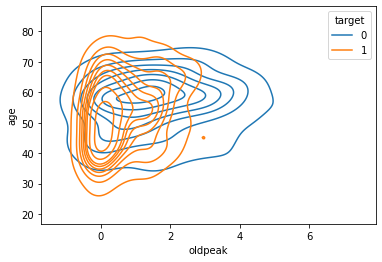

In [39]:
sns.kdeplot(x=df['oldpeak'],y=df['age'],hue=df['target'])

# Training Data-Accuracy

In [40]:
print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.8443396226415094


# Test Data-Accuracy

In [41]:
print('Accuracy on Test data :', testing_data_accuracy)

Accuracy on Test data : 0.8461538461538461


# conclusion

In this project i have created a Model which is used to predict the heart attack and failure using the Logistic Regression and have acheived the accuracy of 84% in testing data. 